#### Imports

In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# acquire
import wrangle as w
import env
import explore

# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [2]:
# Acquire Data
df = w.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
#Prepare Data
df = w.prep_telco(df)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No
device_protection,No,No,Yes,Yes,No


In [4]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges',
       'contract_type', 'internet_service_type', 'payment_type',
       'gender_encoded', 'partner_encoded', 'dependents_encoded',
       'phone_service_encoded', 'paperless_billing_encoded', 'churn',
       'multiple_lines_No', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No',
       'streaming_tv_No int

In [5]:
#Split data and set target variable
target = 'churn'
train, validate, test = w.train_validate_test_split(df, target)

In [6]:
#Check length of train, validate, test
print(len(train))
print(len(validate))
print(len(test))

4922
1055
1055


In [7]:
#Describe the data
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,...,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000
mean,0.163145,32.549573,64.640583,2279.278230,0.495530,0.491670,0.301910,0.903088,0.590207,0.265949,...,0.546323,0.208046,0.245632,0.341325,0.438643,0.220033,0.215766,0.224096,0.335636,0.224502
std,0.369536,24.563833,30.096846,2254.640564,0.500031,0.499981,0.459133,0.295868,0.491845,0.441882,...,0.497900,0.405951,0.430505,0.474202,0.496271,0.414310,0.411394,0.417028,0.472260,0.417296
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.150000,400.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.300000,1398.975000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,89.850000,3810.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Get data types of columns
train.dtypes

gender                                     object
senior_citizen                              int64
partner                                    object
dependents                                 object
tenure                                      int64
phone_service                              object
multiple_lines                             object
online_security                            object
online_backup                              object
device_protection                          object
tech_support                               object
streaming_tv                               object
streaming_movies                           object
paperless_billing                          object
monthly_charges                           float64
total_charges                             float64
contract_type                              object
internet_service_type                      object
payment_type                               object
gender_encoded                              int64


In [9]:
num_vars = ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']
cat_vars = ['gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection', \
            'tech_support', 'streaming_tv', 'streaming_movies','paperless_billing','contract_type','internet_service_type', \
            'payment_type']

gender
Male      2483
Female    2439
Name: gender, dtype: int64
Male      50.446973
Female    49.553027
Name: gender, dtype: float64


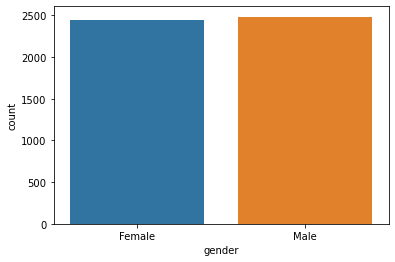

partner
No     2502
Yes    2420
Name: partner, dtype: int64
No     50.832995
Yes    49.167005
Name: partner, dtype: float64


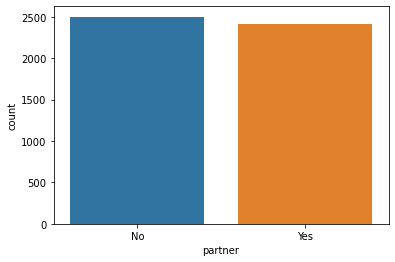

dependents
No     3436
Yes    1486
Name: dependents, dtype: int64
No     69.809021
Yes    30.190979
Name: dependents, dtype: float64


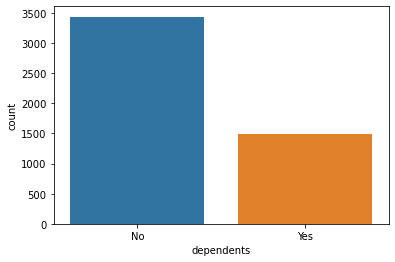

phone_service
Yes    4445
No      477
Name: phone_service, dtype: int64
Yes    90.308818
No      9.691182
Name: phone_service, dtype: float64


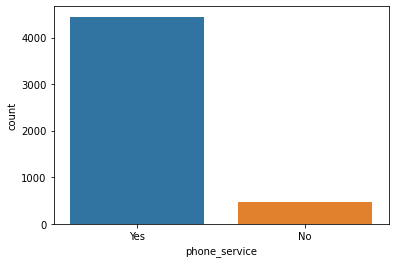

multiple_lines
No                  2392
Yes                 2053
No phone service     477
Name: multiple_lines, dtype: int64
No                  48.598131
Yes                 41.710687
No phone service     9.691182
Name: multiple_lines, dtype: float64


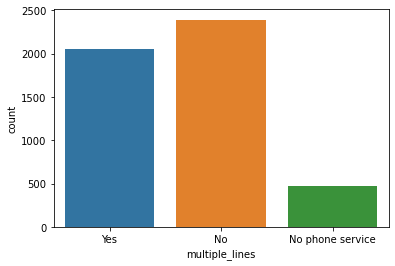

online_security
No                     2437
Yes                    1402
No internet service    1083
Name: online_security, dtype: int64
No                     49.512393
Yes                    28.484356
No internet service    22.003251
Name: online_security, dtype: float64


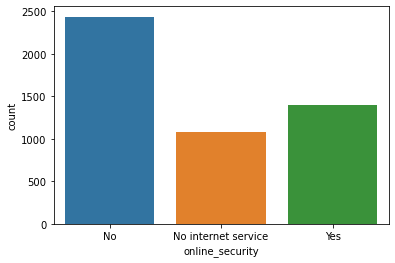

online_backup
No                     2141
Yes                    1698
No internet service    1083
Name: online_backup, dtype: int64
No                     43.498578
Yes                    34.498171
No internet service    22.003251
Name: online_backup, dtype: float64


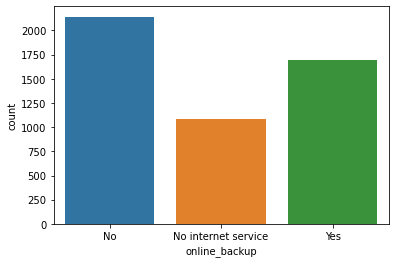

device_protection
No                     2137
Yes                    1702
No internet service    1083
Name: device_protection, dtype: int64
No                     43.417310
Yes                    34.579439
No internet service    22.003251
Name: device_protection, dtype: float64


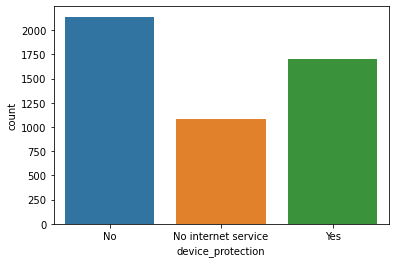

tech_support
No                     2406
Yes                    1433
No internet service    1083
Name: tech_support, dtype: int64
No                     48.882568
Yes                    29.114181
No internet service    22.003251
Name: tech_support, dtype: float64


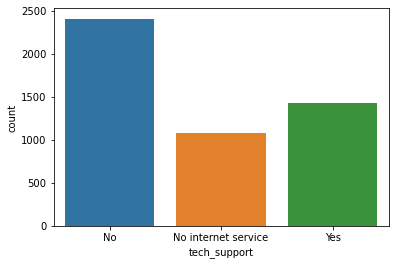

streaming_tv
No                     1967
Yes                    1872
No internet service    1083
Name: streaming_tv, dtype: int64
No                     39.963430
Yes                    38.033320
No internet service    22.003251
Name: streaming_tv, dtype: float64


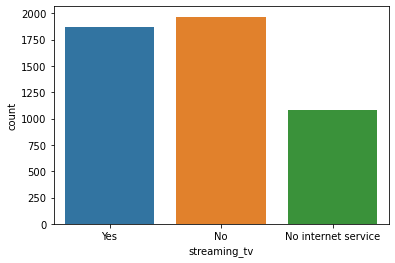

streaming_movies
Yes                    1922
No                     1917
No internet service    1083
Name: streaming_movies, dtype: int64
Yes                    39.049167
No                     38.947582
No internet service    22.003251
Name: streaming_movies, dtype: float64


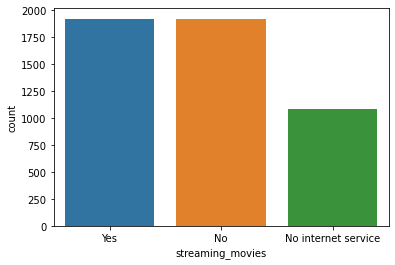

paperless_billing
Yes    2905
No     2017
Name: paperless_billing, dtype: int64
Yes    59.020723
No     40.979277
Name: paperless_billing, dtype: float64


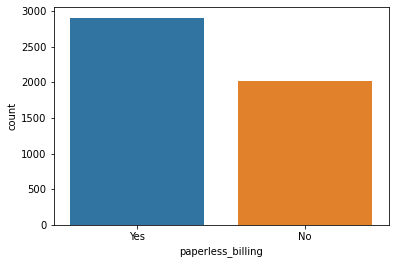

contract_type
Month-to-month    2689
Two year          1209
One year          1024
Name: contract_type, dtype: int64
Month-to-month    54.632263
Two year          24.563186
One year          20.804551
Name: contract_type, dtype: float64


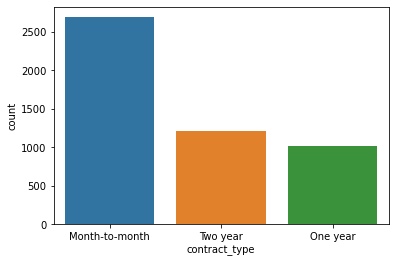

internet_service_type
Fiber optic    2159
DSL            1680
None           1083
Name: internet_service_type, dtype: int64
Fiber optic    43.864283
DSL            34.132466
None           22.003251
Name: internet_service_type, dtype: float64


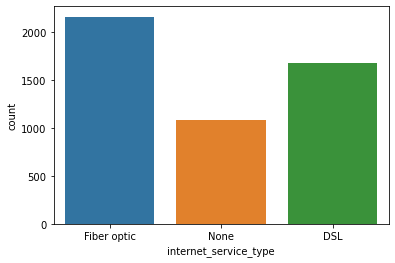

payment_type
Electronic check             1652
Mailed check                 1105
Credit card (automatic)      1103
Bank transfer (automatic)    1062
Name: payment_type, dtype: int64
Electronic check             33.563592
Mailed check                 22.450223
Credit card (automatic)      22.409590
Bank transfer (automatic)    21.576595
Name: payment_type, dtype: float64


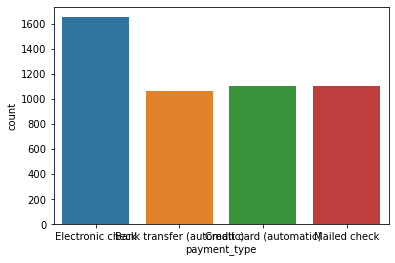

In [10]:
for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

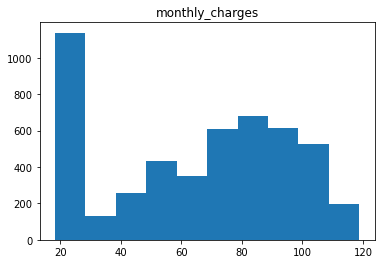

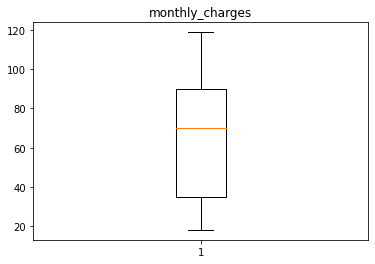

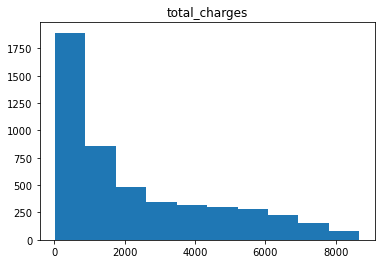

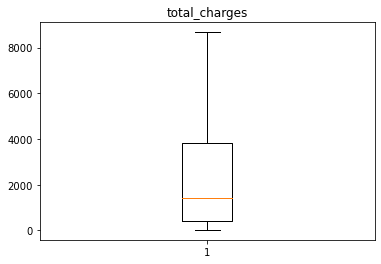

In [11]:
# Visualize float columns
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

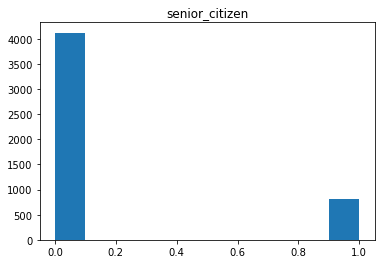

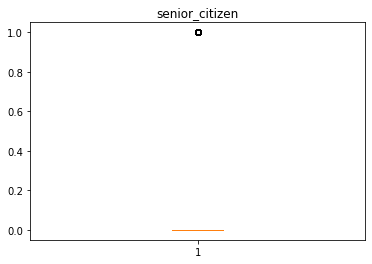

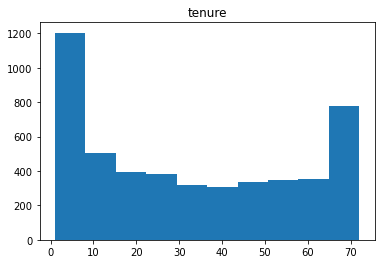

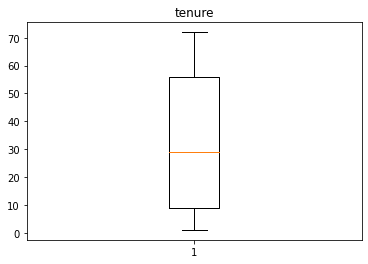

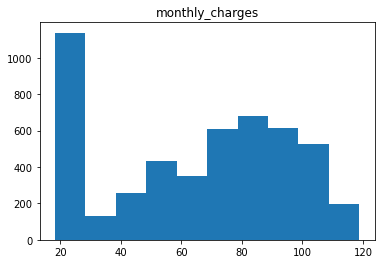

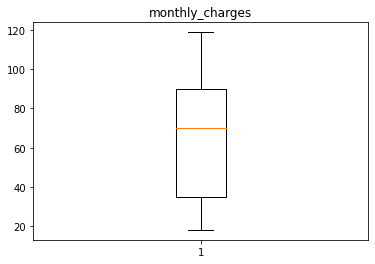

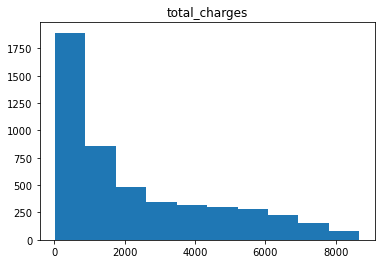

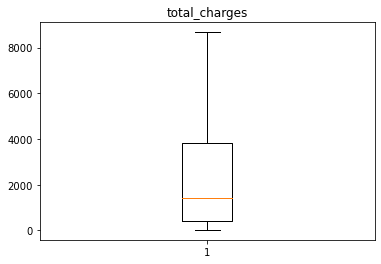

In [12]:
#Visualize other numeric data
# Plot numeric columns
for col in num_vars:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [13]:
#Target variable value counts
train.churn.value_counts()

0    3613
1    1309
Name: churn, dtype: int64

### Bivariate Analysis

In [14]:
def cat_vis(train, col):
    plt.title('Relationship of churn rate and '+col)
    sns.barplot(x=col, y='churn', data=train)
    survival_rate = train.churn.mean()
    plt.axhline(survival_rate, label='churn rate')
    plt.legend()
    plt.show()

In [15]:
def cat_test(train, col):
    alpha = 0.05
    null_hyp = col+' and churn rate are independent'
    alt_hyp = 'There is a relationship between churn rate and '+col
    observed = pd.crosstab(train.churn, train[col])
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    if p < alpha:
        print('We reject the null hypothesis that', null_hyp)
        print(alt_hyp)
    else:
        print('We fail to reject the null hypothesis that', null_hyp)
        print('There appears to be no relationship between survival rate and '+col)

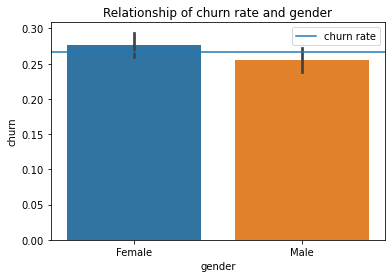

We fail to reject the null hypothesis that gender and churn rate are independent
There appears to be no relationship between survival rate and gender


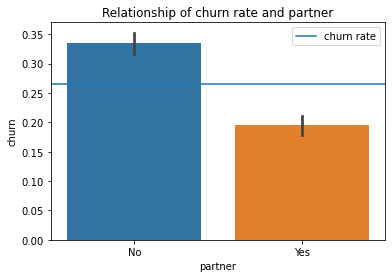

We reject the null hypothesis that partner and churn rate are independent
There is a relationship between churn rate and partner


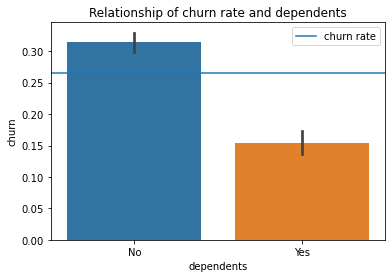

We reject the null hypothesis that dependents and churn rate are independent
There is a relationship between churn rate and dependents


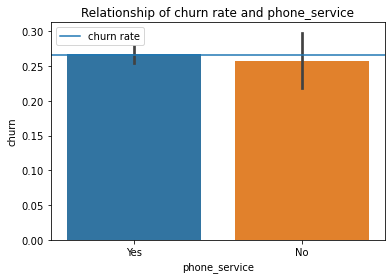

We fail to reject the null hypothesis that phone_service and churn rate are independent
There appears to be no relationship between survival rate and phone_service


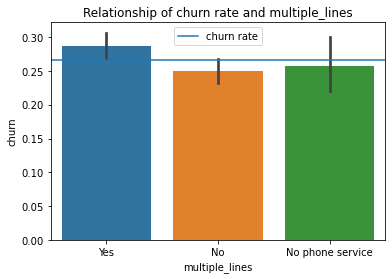

We reject the null hypothesis that multiple_lines and churn rate are independent
There is a relationship between churn rate and multiple_lines


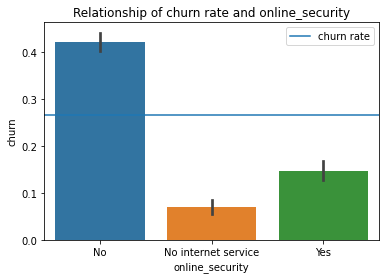

We reject the null hypothesis that online_security and churn rate are independent
There is a relationship between churn rate and online_security


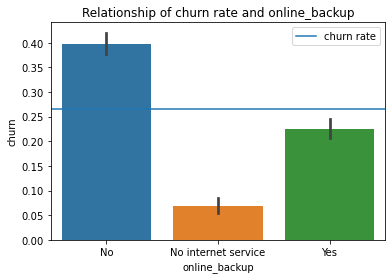

We reject the null hypothesis that online_backup and churn rate are independent
There is a relationship between churn rate and online_backup


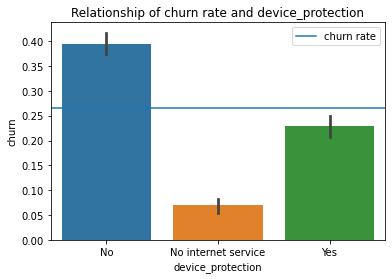

We reject the null hypothesis that device_protection and churn rate are independent
There is a relationship between churn rate and device_protection


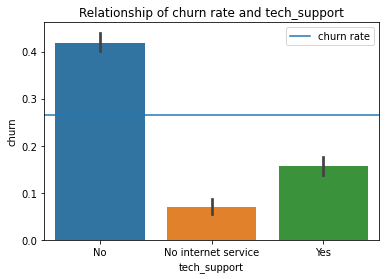

We reject the null hypothesis that tech_support and churn rate are independent
There is a relationship between churn rate and tech_support


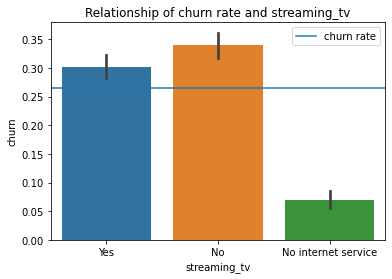

We reject the null hypothesis that streaming_tv and churn rate are independent
There is a relationship between churn rate and streaming_tv


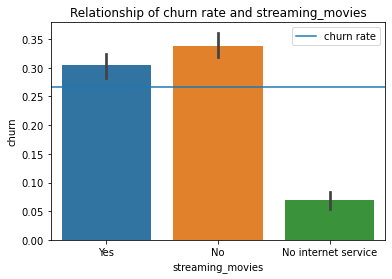

We reject the null hypothesis that streaming_movies and churn rate are independent
There is a relationship between churn rate and streaming_movies


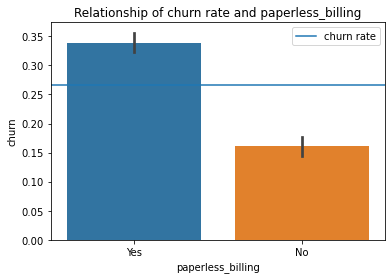

We reject the null hypothesis that paperless_billing and churn rate are independent
There is a relationship between churn rate and paperless_billing


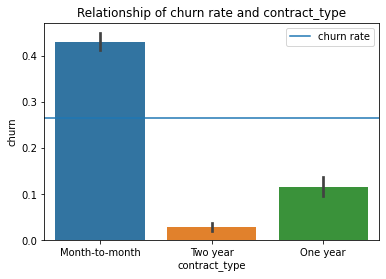

We reject the null hypothesis that contract_type and churn rate are independent
There is a relationship between churn rate and contract_type


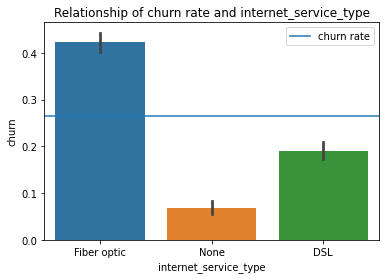

We reject the null hypothesis that internet_service_type and churn rate are independent
There is a relationship between churn rate and internet_service_type


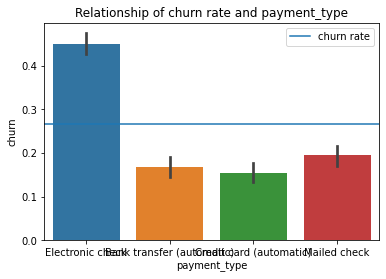

We reject the null hypothesis that payment_type and churn rate are independent
There is a relationship between churn rate and payment_type


In [16]:
for col in cat_vars:
    cat_vis(train, col)
    cat_test(train, col)

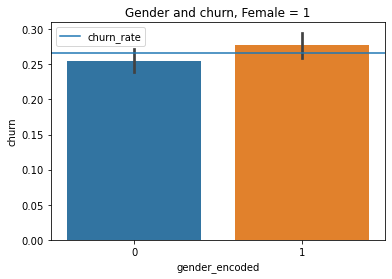

In [17]:
#Looking at relationship between gender and churn

plt.title("Gender and churn, Female = 1")
sns.barplot(x="gender_encoded", y="churn", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

### 1. Gender_Encoded (female ==1) vs. Churn:

Hypotheses:

H^0: The churn rate of women is less than or equal to the chrn rate of men.

H^a: The churn rate of women is greater than the churn rate of men

In [18]:
# Chi-Square test to compare two categorical variables (Gender and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of women is less than or equal to the chrn rate of men."
alternative_hypothesis = "The churn rate of women is greater than the churn rate of men."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train['gender_encoded'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Fail to reject the null
Insufficient evidence to reject the null


#### Conclusion for gender: not a significant difference for churn rate

### Looking at relationship between senior citizens and churn

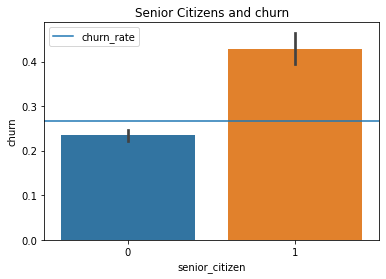

In [19]:
plt.title("Senior Citizens and churn")
sns.barplot(x="senior_citizen", y="churn", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

### Senior Citizen vs. Churn:

Hypotheses:

H^0: The churn rate of senior citizens is less than or equal to the churn rate of non-senior citizens.

H^a: The churn rate of senior citizens is greater than the churn rate of non-senior citizens.

In [20]:
# Chi-Square test to compare two categorical variables (Senior Citizen Status and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of senior citizens is less than or equal to the churn rate of non-senior citizens."
alternative_hypothesis = "The churn rate of senior citizens is greater than the churn rate of non-senior citizens."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train['senior_citizen'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that The churn rate of senior citizens is less than or equal to the churn rate of non-senior citizens.
Sufficient evidence to move forward understanding that The churn rate of senior citizens is greater than the churn rate of non-senior citizens.


#### Churn rate of senior citizens vs non-senior citizens is significant

### Looking at relationship between partnered customers and churn

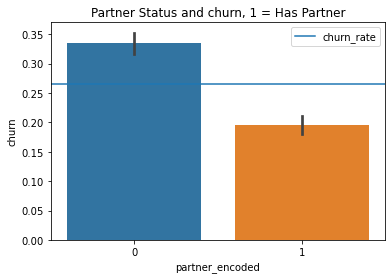

In [21]:
plt.title("Partner Status and churn, 1 = Has Partner")
sns.barplot(x="partner_encoded", y="churn", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

### 1. Partner_encoded (has partner ==1) vs. Churn:

Hypotheses:

H^0: The churn rate of partnered customers is greater than or equal to the churn rate of single customers.

H^a: The churn rate of partnered customers is less than the churn rate of single customers.

In [22]:
# Chi-Square test to compare two categorical variables (Partner and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of partnered customers is greater than or equal to the churn rate of single customers."
alternative_hypothesis = "The churn rate of partnered customers is less than the churn rate of single customers."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train['partner_encoded'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that The churn rate of partnered customers is greater than or equal to the churn rate of single customers.
Sufficient evidence to move forward understanding that The churn rate of partnered customers is less than the churn rate of single customers.


### Conclusion for partner status: significant relationship

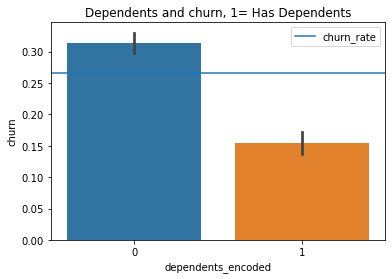

In [23]:
#Looking at relationship between dependents and churn

plt.title("Dependents and churn, 1= Has Dependents")
sns.barplot(x="dependents_encoded", y="churn", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

### Has Dependents vs. Churn:

Hypotheses:

H^0: The churn rate of those with dependents is greater than or equal to those without dependents.

H^a: The churn rate of those with dependents is less than those without dependents.

In [24]:
# Chi-Square test to compare two categorical variables (Senior Citizen Status and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of those with dependents is greater than or equal to those without dependents."
alternative_hypothesis = "The churn rate of those with dependents is less than those without dependents."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train['senior_citizen'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

7.8439372513347e-30

In [25]:
if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that The churn rate of those with dependents is greater than or equal to those without dependents.
Sufficient evidence to move forward understanding that The churn rate of those with dependents is less than those without dependents.


### Contract Type vs. Churn:

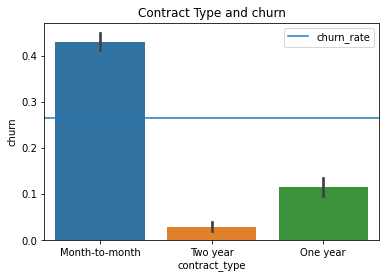

In [26]:
#Looking at relationship between contract type and churn

plt.title("Contract Type and churn")
sns.barplot(x="contract_type", y="churn", data=train)
churn_rate = train.churn.mean()
plt.axhline(churn_rate, label="churn_rate")
plt.legend()
plt.show()

### Establish Hypothesis: Contract_Type

Hypotheses:

H^0: The churn rate of those on a month-to-month contract is less than or equal to other customers.

H^a: The churn rate of those on a month-to-month contract is greater than other customers.

In [27]:
# Chi-Square test to compare two categorical variables (Senior Citizen Status and Churn)

alpha = 0.05
null_hypothesis = "The churn rate of those on a month-to-month contract is less than or equal to other customers."
alternative_hypothesis = "The churn rate of those on a month-to-month contract is greater than other customers."

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train['contract_type'])

chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.5618058560756162e-182

In [28]:
if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that The churn rate of those on a month-to-month contract is less than or equal to other customers.
Sufficient evidence to move forward understanding that The churn rate of those on a month-to-month contract is greater than other customers.


## Examining Numeric variables vs discrete (Churn)

In [29]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4407,Female,0,No,No,50,Yes,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
1756,Male,0,No,No,4,Yes,No,No,No,No,...,1,0,0,0,1,0,0,0,1,0
4669,Male,0,Yes,Yes,72,Yes,No,No internet service,No internet service,No internet service,...,0,0,1,0,0,1,0,0,1,0
2379,Female,0,Yes,Yes,71,Yes,Yes,Yes,Yes,Yes,...,0,0,1,0,1,0,1,0,0,0
4118,Male,0,Yes,Yes,56,Yes,Yes,No,Yes,No,...,1,0,0,0,1,0,0,1,0,0


In [30]:
num_vars

['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']

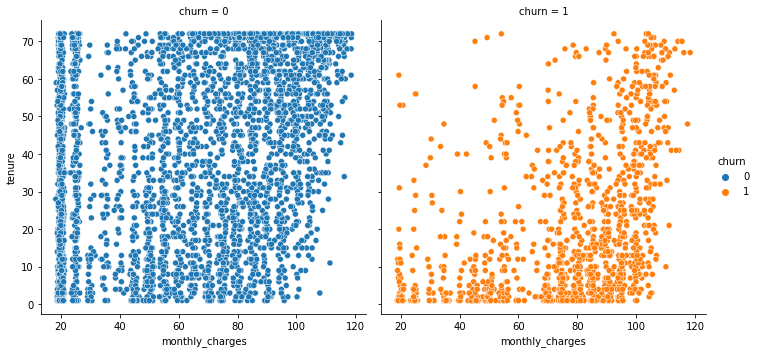

In [31]:
sns.relplot(data=train, x='monthly_charges', y='tenure', kind='scatter', hue='churn', col='churn')

<AxesSubplot:xlabel='churn', ylabel='tenure'>

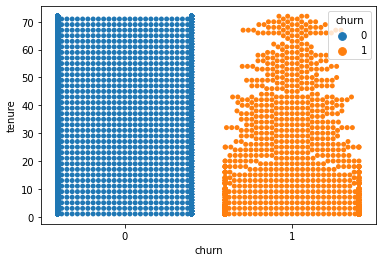

In [32]:
sns.swarmplot(data=train, x='churn', y='tenure', hue='churn')

### Looking at tenure vs. churn rate

In [33]:
# Subset the data into churn and not-churned status
not_churned = train[train.churn == 0]
churned = train[train.churn == 1]

In [34]:
churned.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
1756,Male,0,No,No,4,Yes,No,No,No,No,...,1,0,0,0,1,0,0,0,1,0
6207,Male,1,No,No,1,No,No phone service,No,No,Yes,...,1,0,0,1,0,0,0,0,1,0
3599,Male,0,No,No,11,Yes,No,Yes,No,No,...,1,0,0,0,1,0,0,0,1,0
5039,Female,0,No,No,15,Yes,Yes,No internet service,No internet service,No internet service,...,1,0,0,0,0,1,0,1,0,0
223,Female,0,No,No,6,Yes,No,No,No,No,...,1,0,0,0,1,0,0,0,1,0


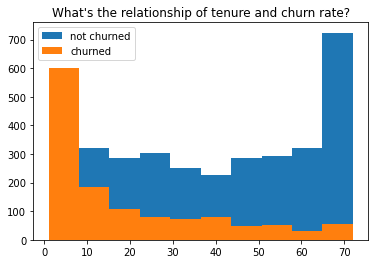

In [35]:
plt.title("What's the relationship of tenure and churn rate?")
plt.hist(not_churned.tenure, label="not churned")
plt.hist(churned.tenure, label="churned")
plt.legend()
plt.show()

#### It appears that customers with a longer tenure churn less

#### Establish Hypotheses:

$H_0$ : null_hypothesis = "Customers with a higher mean tenure have a churn rate greater than or equal to those with a shorter tenure."

$H_a$: alternative_hypothesis = "Customers with a higher mean tenure churn less than those with shorter tenure."

In [36]:
# check variances of the two groups
not_churned.tenure.var(), churned.tenure.var()

(581.7647560688213, 389.679911831285)

In [37]:
#Need to ensure variances are equal
stat, pval = stats.levene(not_churned.tenure, churned.tenure)
pval
# pval is significant so we can conclude variances are NOT equal

1.7397543077146337e-58

In [38]:
# Two-sample T-test to compare a continuous variable (tenure) with a categorical variable (churn)
alpha = 0.05
null_hypothesis = "Customers with a higher tenure have a churn rate greater than or equal to those with a shorter tenure."
alternative_hypothesis = "Customers with a higher tenure have a lower churn rate than those with shorter tenure."

# Setup test
t, p = stats.ttest_ind(not_churned.tenure, churned.tenure, equal_var=False)
t, p

(28.50778830481801, 3.210034358004407e-157)

In [39]:
if (p/2 < alpha) & (t > 0):
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")

Reject the null hypothesis that Customers with a higher tenure have a churn rate greater than or equal to those with a shorter tenure.
Sufficient evidence to move forward understanding that Customers with a higher tenure have a lower churn rate than those with shorter tenure.


### Conclusion: Customers with a longer tenure (in months) have a lower churn rate than customers with lower tenures

### Looking at monthly charges relationship to churn rate

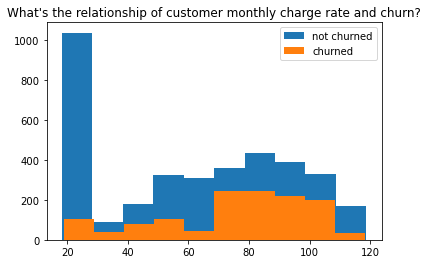

In [40]:
plt.title("What's the relationship of customer monthly charge rate and churn?")
plt.hist(not_churned.monthly_charges, label="not churned")
plt.hist(churned.monthly_charges, label="churned")
plt.legend()
plt.show()

<AxesSubplot:xlabel='monthly_charges'>

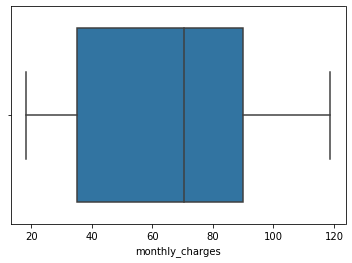

In [41]:
sns.boxplot(x='monthly_charges', data=train)

In [42]:
def monthly_charges_md(train):
    # Subset the data into churn and not-churned status
    not_churned = train[train.churn == 0]
    churned = train[train.churn == 1]
    #assign values and labels
    values = [not_churned.monthly_charges.mean(), churned.monthly_charges.mean()]
    labels = ['not_churned', 'churned']
    # generate and display chart
    plt.bar(height=values, x=labels, color=['#ffc3a0', '#c0d6e4'])
    plt.title('Customer monthly charge amount differences in churn vs non-churn')
    plt.tight_layout()
    plt.show()

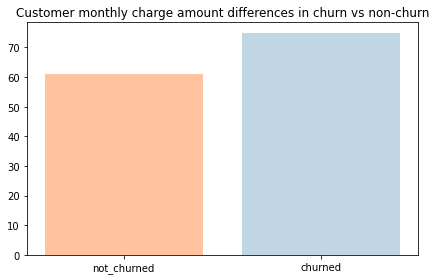

In [43]:
monthly_charges_md(train)

#### It appears that customers who lower monthly charges churn more?

$H_0$ : null_hypothesis = "Customers with lower monthly charges have a mean churn rate greater than or equal to those with higher charges."

$H_a$: alternative_hypothesis = "Customers with lower monthly charges have a lower mean churn rate than those with higher monthly charges."

In [44]:
# check variances of the two groups
not_churned.monthly_charges.var(), churned.monthly_charges.var()

(965.508171621473, 603.4479280323469)

In [45]:
#Need to ensure variances are equal
stat, pval = stats.levene(not_churned.monthly_charges, churned.monthly_charges)
pval
# pval is significant so we can conclude variances are NOT equal

1.5630731582434918e-57

In [46]:
# Two-sample T-test to compare a continuous variable (tenure) with a categorical variable (churn)
alpha = 0.05
null_hypothesis = "Customers with lower monthly charges have a mean churn rate greater than or equal to those with higher charges"
alternative_hypothesis = "Customers with lower monthly charges have a lower mean churn rate than those with higher monthly charges."

# Setup test
t, p = stats.ttest_ind(not_churned.monthly_charges, churned.monthly_charges, equal_var=False)
t, p

(-16.074976262764665, 8.990395123213902e-56)

In [47]:
if (p/2 < alpha):
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")

Reject the null hypothesis that Customers with lower monthly charges have a mean churn rate greater than or equal to those with higher charges
Sufficient evidence to move forward understanding that Customers with lower monthly charges have a lower mean churn rate than those with higher monthly charges.


### Looking at total charges relationship to churn rate

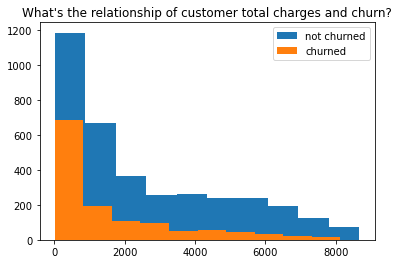

In [48]:
plt.title("What's the relationship of customer total charges and churn?")
plt.hist(not_churned.total_charges, label="not churned")
plt.hist(churned.total_charges, label="churned")
plt.legend()
plt.show()

<AxesSubplot:xlabel='total_charges'>

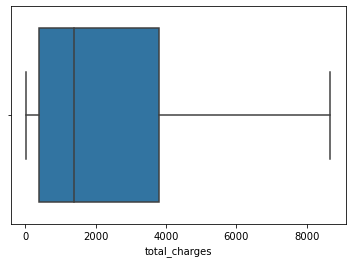

In [49]:
sns.boxplot(x='total_charges', data=train)

In [50]:
def total_charges_md(train):
    # Subset the data into churn and not-churned status
    not_churned = train[train.churn == 0]
    churned = train[train.churn == 1]
    #assign values and labels
    values = [not_churned.total_charges.mean(), churned.total_charges.mean()]
    labels = ['not_churned', 'churned']
    # generate and display chart
    plt.bar(height=values, x=labels, color=['#ffc3a0', '#c0d6e4'])
    plt.title('Customer mean total charge differences (churn vs non-churn)')
    plt.tight_layout()
    plt.show()

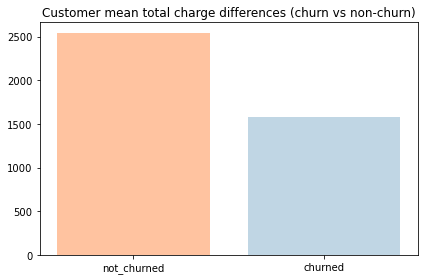

In [51]:
total_charges_md(train)

$H_0$ : null_hypothesis = "Customers with higher total charges have a mean churn rate greater than or equal to those with lower total charges."

$H_a$: alternative_hypothesis = "Customers with higher total charges have a lower mean churn rate than those with lower total charges."

#### It appears that the mean total charges for customers who churned is higher than those who did not churn

In [52]:
# check variances of the two groups
not_churned.total_charges.var(), churned.total_charges.var()

(5357521.492075216, 3652610.2915710476)

In [53]:
#Need to ensure variances are equal
stat, pval = stats.levene(not_churned.total_charges, churned.total_charges)
pval
# pval is significant so we can conclude variances are NOT equal

4.5964991297566226e-23

In [54]:
# Two-sample T-test to compare a continuous variable (monthly charges) with a categorical variable (churn)
alpha = 0.05
null_hypothesis = "Customers with higher total charges have a mean churn rate greater than or equal to those with lower total charges."
alternative_hypothesis = "Customers with higher total charges have a lower mean churn rate than those with lower total charges."

# Setup test
t, p = stats.ttest_ind(not_churned.total_charges, churned.total_charges, equal_var=False)
t, p

(14.693186342527401, 3.9686459602437414e-47)

In [55]:
if (p/2 < alpha):
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")

Reject the null hypothesis that Customers with higher total charges have a mean churn rate greater than or equal to those with lower total charges.
Sufficient evidence to move forward understanding that Customers with higher total charges have a lower mean churn rate than those with lower total charges.


### Modeling

In [56]:
X_train, X_validate, X_test, y_train, y_validate, y_test = w.model_prep(train, validate, test)

In [57]:
X_train.head()

,senior_citizen,dependents_encoded,monthly_charges,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
0,0,0,95.70,1,0,0
1,0,0,70.20,1,0,0
2,0,1,20.35,0,0,1
3,0,1,109.00,0,0,1
4,0,1,96.95,1,0,0


In [58]:
X_train.shape
X_validate.shape
X_test.shape

(1055, 6)

In [59]:
#Find Baseline
y_train.value_counts()
#Baseline is 0, customer did not churn

churn
0        3613
1        1309
dtype: int64

In [60]:
#Baseline Accuracy
(y_train == 0).mean()

churn    0.734051
dtype: float64

### Decision Tree

In [61]:
tree = DecisionTreeClassifier(max_depth=3, random_state=123)

In [62]:
# model.fit(X, y)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [63]:
print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- contract_type_Month-to-month <= 0.50
|   |--- monthly_charges <= 95.22
|   |   |--- contract_type_Two year <= 0.50
|   |   |   |--- class: 0
|   |   |--- contract_type_Two year >  0.50
|   |   |   |--- class: 0
|   |--- monthly_charges >  95.22
|   |   |--- contract_type_One year <= 0.50
|   |   |   |--- class: 0
|   |   |--- contract_type_One year >  0.50
|   |   |   |--- class: 0
|--- contract_type_Month-to-month >  0.50
|   |--- monthly_charges <= 69.22
|   |   |--- monthly_charges <= 20.93
|   |   |   |--- class: 0
|   |   |--- monthly_charges >  20.93
|   |   |   |--- class: 0
|   |--- monthly_charges >  69.22
|   |   |--- monthly_charges <= 107.42
|   |   |   |--- class: 1
|   |   |--- monthly_charges >  107.42
|   |   |   |--- class: 0



In [65]:
#Use your model to make predictions on the in-sample data
tree.predict(X_train)

array([1, 1, 0, ..., 0, 1, 1])

In [66]:
y_pred = tree.predict(X_train)
actual = y_train

In [67]:
y_pred.shape

(4922,)

In [68]:
#Baseline accuracy
(y_train == 0).mean()

churn    0.734051
dtype: float64

In [69]:
y_pred_proba = tree.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.46359385, 0.53640615],
       [0.46359385, 0.53640615],
       [0.98540146, 0.01459854],
       [0.916     , 0.084     ],
       [0.46359385, 0.53640615]])

### Evaluating in-sample results using the model score, confusion matrix, and classification report.

In [70]:
confusion_matrix(actual, y_pred)

array([[2919,  694],
       [ 506,  803]])

In [71]:
print(classification_report(actual, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3613
           1       0.54      0.61      0.57      1309

    accuracy                           0.76      4922
   macro avg       0.69      0.71      0.70      4922
weighted avg       0.77      0.76      0.76      4922



In [72]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.76


### 76 percent accuracy for decision tree on training set

In [73]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[2919,  694],
       [ 506,  803]])

In [74]:
y_train.value_counts()

churn
0        3613
1        1309
dtype: int64

In [75]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of 3 depth")
pd.DataFrame(report)

Tree of 3 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.852263,0.536406,0.756197,0.694334,0.768261
recall,0.807916,0.613445,0.756197,0.710681,0.756197
f1-score,0.829497,0.572345,0.756197,0.700921,0.761108
support,3613.000000,1309.000000,0.756197,4922.000000,4922.000000


In [76]:
#Calculating TP, FP, FN, TP
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

(2919, 694, 506, 803)

In [77]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.7561966680211296 

True Positive Rate/Sensitivity/Recall/Power: 0.6134453781512605 

False Positive Rate/False Alarm Ratio/Fall-out: 0.1920841406033767 

True Negative Rate/Specificity/Selectivity: 0.8079158593966234 

False Negative Rate/Miss Rate: 0.3865546218487395 

Precision/PPV: 0.5364061456245826 

F1 Score: 0.5723449750534569 

Support (0): 3613 

Support (1): 1309


### Evaluate on validate data

In [78]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.75


In [79]:
# Produce y_predictions that come from the X_validate
y_pred_validate = tree.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred_validate))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       775
           1       0.53      0.61      0.57       280

    accuracy                           0.75      1055
   macro avg       0.69      0.71      0.70      1055
weighted avg       0.77      0.75      0.76      1055



In [80]:
# confusion matrix

confusion_matrix(y_validate, y_pred_validate)

array([[625, 150],
       [109, 171]])

In [81]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_validate, y_pred_validate, output_dict=True)
print("Tree of 3 depth")
pd.DataFrame(report)

Tree of 3 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.851499,0.532710,0.754502,0.692104,0.766891
recall,0.806452,0.610714,0.754502,0.708583,0.754502
f1-score,0.828363,0.569052,0.754502,0.698707,0.759541
support,775.000000,280.000000,0.754502,1055.000000,1055.000000


In [82]:
#Running on validate
TN, FP, FN, TP = confusion_matrix(y_validate, y_pred_validate).ravel()
TN, FP, FN, TP

(625, 150, 109, 171)

In [83]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.7545023696682465 

True Positive Rate/Sensitivity/Recall/Power: 0.6107142857142858 

False Positive Rate/False Alarm Ratio/Fall-out: 0.1935483870967742 

True Negative Rate/Specificity/Selectivity: 0.8064516129032258 

False Negative Rate/Miss Rate: 0.3892857142857143 

Precision/PPV: 0.5327102803738317 

F1 Score: 0.5690515806988353 

Support (0): 775 

Support (1): 280


### Conclusion for decision tree (depth 3): very close results between training and validate. 76/75 percent accuracy respectively. Baseline is 73.4 so both outperform baseline

### Looking at changing depth

In [ ]:
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

### Comparing in-sample to out of sample performance

In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

#### It appears that a depth of 3-5 would be the best to ensure closer performance on test/validate

### Re-run decision tree with depth of 4

In [84]:
tree2 = DecisionTreeClassifier(max_depth=4, random_state=123)
# model.fit(X, y)
tree2.fit(X_train, y_train)
y_pred = tree2.predict(X_train)
actual = y_train

In [85]:
y_pred_proba = tree2.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.44498382, 0.55501618],
       [0.44498382, 0.55501618],
       [0.9889258 , 0.0110742 ],
       [0.92622951, 0.07377049],
       [0.55172414, 0.44827586]])

In [86]:
confusion_matrix(actual, y_pred)

array([[3062,  551],
       [ 619,  690]])

In [87]:
# Classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of 4 depth")
pd.DataFrame(report)

Tree of 4 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.831839,0.556003,0.762292,0.693921,0.758481
recall,0.847495,0.527120,0.762292,0.687308,0.762292
f1-score,0.839594,0.541176,0.762292,0.690385,0.760230
support,3613.000000,1309.000000,0.762292,4922.000000,4922.000000


In [88]:
#Calculating TP, FP, FN, TP
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

(3062, 551, 619, 690)

In [89]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.7622917513206013 

True Positive Rate/Sensitivity/Recall/Power: 0.5271199388846448 

False Positive Rate/False Alarm Ratio/Fall-out: 0.15250484362026018 

True Negative Rate/Specificity/Selectivity: 0.8474951563797398 

False Negative Rate/Miss Rate: 0.47288006111535524 

Precision/PPV: 0.5560032232070911 

F1 Score: 0.5411764705882353 

Support (0): 3613 

Support (1): 1309


#### Running against validate data

In [90]:
y_pred_validate = tree2.predict(X_validate)

In [91]:
#Running on validate
TN, FP, FN, TP = confusion_matrix(y_validate, y_pred_validate).ravel()
TN, FP, FN, TP

(663, 112, 139, 141)

In [92]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.762085308056872 

True Positive Rate/Sensitivity/Recall/Power: 0.5035714285714286 

False Positive Rate/False Alarm Ratio/Fall-out: 0.14451612903225808 

True Negative Rate/Specificity/Selectivity: 0.8554838709677419 

False Negative Rate/Miss Rate: 0.49642857142857144 

Precision/PPV: 0.5573122529644269 

F1 Score: 0.5290806754221389 

Support (0): 775 

Support (1): 280


#### I will use decision tree model with depth of 3, it has a slightly lower accuracy than four, and a small difference in accuracy between training and validate data. It also has a higher recall rate (0.61) than tree model with depth of 4.

## Random Forest Modeling

In [93]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [94]:
#fit the model, max depth 3, min sample leaf 3
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [95]:
# Evaluate importance, or weight, of each feature.
print(rf.feature_importances_)

[0.0313264  0.03418535 0.1775129  0.43672083 0.10585512 0.2143994 ]


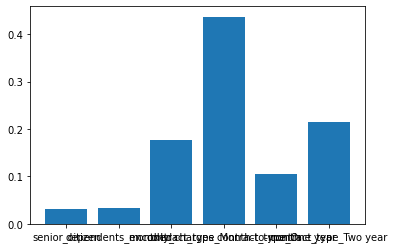

In [96]:
#Visualize feature importance
plt.bar(X_train.columns, rf.feature_importances_)
plt.show()

In [97]:
#interpret feature weight
X_train.head()

,senior_citizen,dependents_encoded,monthly_charges,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
0,0,0,95.70,1,0,0
1,0,0,70.20,1,0,0
2,0,1,20.35,0,0,1
3,0,1,109.00,0,0,1
4,0,1,96.95,1,0,0


In [98]:
#Make predictions
y_pred = rf.predict(X_train)

In [99]:
#Estimate Probability
y_pred_proba = rf.predict_proba(X_train)

### Evaluate model performance on training data

In [100]:
#Evaluate model performance
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.75


In [101]:
rf.score(X_train, y_train)

0.7513206013815522

In [102]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[3447  166]
 [1058  251]]


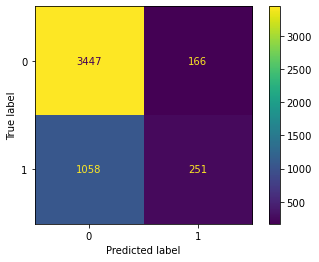

In [103]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [104]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      3613
           1       0.60      0.19      0.29      1309

    accuracy                           0.75      4922
   macro avg       0.68      0.57      0.57      4922
weighted avg       0.72      0.75      0.70      4922



In [105]:
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

(251, 3447, 166, 1058, 4922)

In [106]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7513206013815522
True Positive Rate: 0.1917494270435447
False Positive Rate: 0.045945197896484914
True Negative Rate: 0.9540548021035151
False Negative Rate: 0.8082505729564553
Precision: 0.6019184652278178
Recall: 0.1917494270435447
F1 Score: 0.290845886442642
Support (0): 1309
Support (1): 3613


### Comparing in-sample to out of sample performance (evaluate on validate data)

In [107]:
rf.score(X_validate, y_validate)

0.7459715639810427

In [108]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.75


In [109]:
y_pred_validate = tree2.predict(X_validate)

In [110]:
TN, FP, FN, TP = confusion_matrix(y_validate,y_pred_validate).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

(141, 663, 112, 139, 1055)

In [111]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.762085308056872
True Positive Rate: 0.5035714285714286
False Positive Rate: 0.14451612903225808
True Negative Rate: 0.8554838709677419
False Negative Rate: 0.49642857142857144
Precision: 0.5573122529644269
Recall: 0.5035714285714286
F1 Score: 0.5290806754221389
Support (0): 280
Support (1): 775


### Comparing accuracy of different depths

In [112]:
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                     0       1  accuracy    macro avg  weighted avg
precision     0.734051     0.0  0.734051     0.367026      0.538831
recall        1.000000     0.0  0.734051     0.500000      0.734051
f1-score      0.846632     0.0  0.734051     0.423316      0.621471
support    3613.000000  1309.0  0.734051  4922.000000   4922.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.765150     0.601918  0.751321     0.683534      0.721739
recall        0.954055     0.191749  0.751321     0.572902      0.751321
f1-score      0.849224     0.290846  0.751321     0.570035      0.700724
support    3613.000000  1309.000000  0.751321  4922.000000   4922.000000

Tree with max depth of 4
                     0            1  accuracy    macro avg  weighted avg
precision     0.828032     0.553630  0.760463     0.690831      0.755055
recall        0.850263     0.512605  0.760463     0.681434      0.760463

In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

### Looking at increasing min samples of leaf while decreasing max depth

In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

### increase both min_samples_per_leaf and max_depth

In [ ]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
df[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.grid()

### fixed depth and increasing min_samples_leaf

In [ ]:
metrics = []


for i in range(2, 50):
    # Make the model
    depth = 6
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
df.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,50,5))
plt.grid()

### Going to rerun  random forest modeling with max depth of 5, min samples leaf of 5

In [113]:
rf5 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [114]:
#fit the model, max depth 5, min sample leaf 5
rf5.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, random_state=123)

In [115]:
# Evaluate importance, or weight, of each feature.
print(rf5.feature_importances_)

[0.03284262 0.03637999 0.27725552 0.37322784 0.08984355 0.19045047]


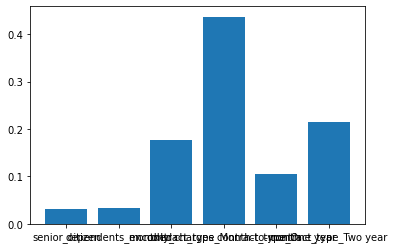

In [116]:
#Visualize feature importance
plt.bar(X_train.columns, rf.feature_importances_)
plt.show()

In [117]:
#Make predictions
y_pred = rf5.predict(X_train)

In [118]:
#Estimate Probability
y_pred_proba = rf5.predict_proba(X_train)

### Evaluate performance of rf model (5,5) on training data

In [119]:
#Evaluate model performance
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf5.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.76


In [120]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[3068  545]
 [ 617  692]]


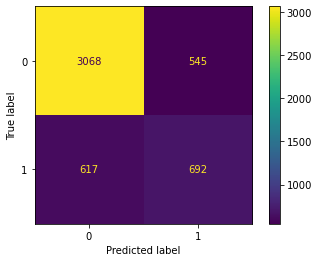

In [121]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf5.classes_)

disp.plot()
plt.show()

In [122]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3613
           1       0.56      0.53      0.54      1309

    accuracy                           0.76      4922
   macro avg       0.70      0.69      0.69      4922
weighted avg       0.76      0.76      0.76      4922



In [123]:
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

(692, 3068, 545, 617, 4922)

In [124]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7639171068671272
True Positive Rate: 0.5286478227654698
False Positive Rate: 0.15084417381677276
True Negative Rate: 0.8491558261832273
False Negative Rate: 0.47135217723453016
Precision: 0.5594179466451091
Recall: 0.5286478227654698
F1 Score: 0.5435978004713276
Support (0): 1309
Support (1): 3613


#### Performance of RF model (5,5) on validate data

In [125]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf5.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.76


In [126]:
y_pred_validate = tree2.predict(X_validate)

In [127]:
TN, FP, FN, TP = confusion_matrix(y_validate,y_pred_validate).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

(141, 663, 112, 139, 1055)

In [128]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.762085308056872
True Positive Rate: 0.5035714285714286
False Positive Rate: 0.14451612903225808
True Negative Rate: 0.8554838709677419
False Negative Rate: 0.49642857142857144
Precision: 0.5573122529644269
Recall: 0.5035714285714286
F1 Score: 0.5290806754221389
Support (0): 280
Support (1): 775


### Conclusion for RF modeling: our best model is 76 percent accurate on training and validation data, about the same as decision tree. Recall (0.52) and precision (0.52)

## K Nearest Neighbor modeling

In [129]:
#Starting with basic model, 5 neighbors
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [130]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [131]:
#Making predictions
y_pred = knn.predict(X_train)

In [132]:
#Estimating probability
y_pred_proba = knn.predict_proba(X_train)

In [133]:
#Accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.82


In [134]:
#Confusion Matrix
print(confusion_matrix(y_train, y_pred))

[[3274  339]
 [ 547  762]]


In [135]:
#Classification Report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3613
           1       0.69      0.58      0.63      1309

    accuracy                           0.82      4922
   macro avg       0.77      0.74      0.76      4922
weighted avg       0.81      0.82      0.81      4922



In [136]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [137]:
ALL = TP + TN + FP + FN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8199918732222674
True Positive Rate: 0.5821237585943468
False Positive Rate: 0.09382784389703847
True Negative Rate: 0.9061721561029615
False Negative Rate: 0.41787624140565316
Precision: 0.6920980926430518
Recall: 0.5821237585943468
F1 Score: 0.6323651452282157
Support (0): 1309
Support (1): 3613


#### Performance on Validate

In [138]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on validate set: 0.72


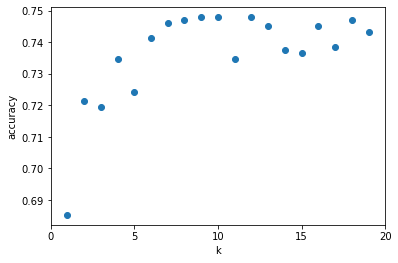

In [139]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [140]:
# iteration to look at different model accuracies:
model_set = []
model_accuracies = {}
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    model_set.append(clf)
    model_accuracies[f'{i}_neighbors'] = {
        'train_score': round(clf.score(X_train, y_train), 2),
        'validate_score': round(clf.score(X_validate, y_validate), 2)}

In [141]:
model_accuracies

{'1_neighbors': {'train_score': 0.91, 'validate_score': 0.69},
 '2_neighbors': {'train_score': 0.83, 'validate_score': 0.72},
 '3_neighbors': {'train_score': 0.85, 'validate_score': 0.7},
 '4_neighbors': {'train_score': 0.82, 'validate_score': 0.73},
 '5_neighbors': {'train_score': 0.82, 'validate_score': 0.72},
 '6_neighbors': {'train_score': 0.8, 'validate_score': 0.73},
 '7_neighbors': {'train_score': 0.81, 'validate_score': 0.73},
 '8_neighbors': {'train_score': 0.8, 'validate_score': 0.74},
 '9_neighbors': {'train_score': 0.8, 'validate_score': 0.74},
 '10_neighbors': {'train_score': 0.79, 'validate_score': 0.74},
 '11_neighbors': {'train_score': 0.79, 'validate_score': 0.73},
 '12_neighbors': {'train_score': 0.79, 'validate_score': 0.74},
 '13_neighbors': {'train_score': 0.79, 'validate_score': 0.73},
 '14_neighbors': {'train_score': 0.79, 'validate_score': 0.75},
 '15_neighbors': {'train_score': 0.79, 'validate_score': 0.73},
 '16_neighbors': {'train_score': 0.78, 'validate_scor

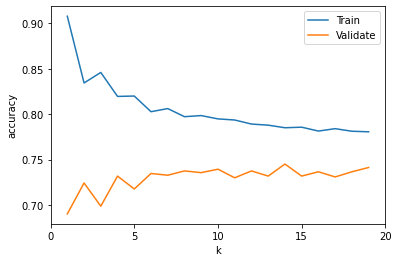

In [142]:
#another iteration to look at best k score
k_range = range(1, 20)
train_scores = []
validate_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(X_validate, y_validate))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.legend()
plt.xticks([0,5,10,15,20])
plt.show()

### Attempting to look further into metrics of k=14

In [143]:
#Running knn on 14
knn14 = KNeighborsClassifier(n_neighbors=14, weights='uniform')
#fitting the model
knn14.fit(X_train, y_train)
#Making predictions
y_pred = knn14.predict(X_train)
#Estimating probability
y_pred_proba = knn14.predict_proba(X_train)
#Accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn14.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.79


In [144]:
#Confusion Matrix
print(confusion_matrix(y_train, y_pred))

[[3328  285]
 [ 773  536]]


In [145]:
#Classification Report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3613
           1       0.65      0.41      0.50      1309

    accuracy                           0.79      4922
   macro avg       0.73      0.67      0.68      4922
weighted avg       0.77      0.79      0.77      4922



In [146]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[3328  285]
 [ 773  536]]


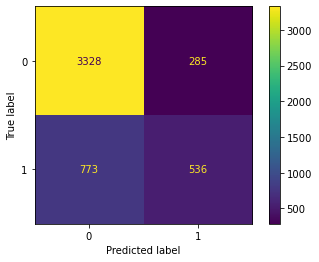

In [147]:
#Plot confusion matrix
plot_confusion_matrix(knn14, X_train, y_train)

In [148]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel() # Why is this line of code failing?

In [149]:
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

(536, 3328, 285, 773, 4922)

In [150]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7850467289719626
True Positive Rate: 0.4094728800611154
False Positive Rate: 0.07888181566565182
True Negative Rate: 0.9211181843343482
False Negative Rate: 0.5905271199388846
Precision: 0.6528623629719854
Recall: 0.4094728800611154
F1 Score: 0.5032863849765259
Support (0): 1309
Support (1): 3613


In [151]:
print('Accuracy of KNN (14) classifier on validate set: {:.2f}'
     .format(knn14.score(X_validate, y_validate)))

Accuracy of KNN (14) classifier on validate set: 0.75


In [152]:
y_pred_validate = knn14.predict(X_validate)

In [153]:
TN, FP, FN, TP = confusion_matrix(y_validate,y_pred_validate).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

(90, 696, 79, 190, 1055)

In [154]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7450236966824645
True Positive Rate: 0.32142857142857145
False Positive Rate: 0.10193548387096774
True Negative Rate: 0.8980645161290323
False Negative Rate: 0.6785714285714286
Precision: 0.5325443786982249
Recall: 0.32142857142857145
F1 Score: 0.400890868596882
Support (0): 280
Support (1): 775


### Conclusion for KNN: a KNN model using 14 nearest neighbors produces an accuracy of .79 percent accuracy on training data, but only 0.75 accuracy on validate data. Additionally, this model produces a large (0.59) portion of False Negatives.

## Regression Modeling

In [155]:
# Make the model, using defaults but lbfgs solver (could be default)
logit = LogisticRegression(solver='lbfgs',random_state=123)

In [156]:
# fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [157]:
# now use the model to make predictions
y_pred = logit.predict(X_train)

In [158]:
# look at predicted probabilites for first 10 observations
logit.predict_proba(X_train)[:10]

array([[0.44786018, 0.55213982],
       [0.55722055, 0.44277945],
       [0.98975224, 0.01024776],
       [0.9545009 , 0.0454991 ],
       [0.53468043, 0.46531957],
       [0.9336129 , 0.0663871 ],
       [0.60905377, 0.39094623],
       [0.54315497, 0.45684503],
       [0.59526296, 0.40473704],
       [0.57140588, 0.42859412]])

In [159]:
# classification report for training data
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      3613
           1       0.54      0.39      0.45      1309

    accuracy                           0.75      4922
   macro avg       0.67      0.63      0.64      4922
weighted avg       0.73      0.75      0.73      4922



In [160]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [161]:
ALL = TP + TN + FP + FN

TP, TN, FP, FN, ALL

(504, 3178, 435, 805, 4922)

In [162]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7480698902885006
True Positive Rate: 0.3850267379679144
False Positive Rate: 0.12039856075283698
True Negative Rate: 0.879601439247163
False Negative Rate: 0.6149732620320856
Precision: 0.536741214057508
Recall: 0.3850267379679144
F1 Score: 0.4483985765124555
Support (0): 1309
Support (1): 3613


In [163]:
# look at model 1 coefficents
 
print('Coefficient: \n', logit.coef_[0])

Coefficient: 
 [ 0.31274309 -0.3697949   0.0172239   1.00025753 -0.76681384 -2.11184164]


In [164]:
# Make a dataframe of model 1 coefficients and feature names

log_coeffs = pd.DataFrame(logit.coef_[0], index = X_train.columns,
                          columns = ['coeffs']).sort_values(by = 'coeffs', ascending = True)
log_coeffs

,coeffs
contract_type_Two year,-2.111842
contract_type_One year,-0.766814
dependents_encoded,-0.369795
monthly_charges,0.017224
senior_citizen,0.312743
contract_type_Month-to-month,1.000258


#### Examining model 1 performance on validate data

In [165]:
print('Logit model 1, default features, solver lbfgs')
print(classification_report(y_validate, logit.predict(X_validate)))

Logit model 1, default features, solver lbfgs
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       775
           1       0.54      0.36      0.43       280

    accuracy                           0.75      1055
   macro avg       0.67      0.62      0.63      1055
weighted avg       0.73      0.75      0.73      1055



#### Making a second iteration of regression, but balancing class weights

In [166]:
#Making a second iteration of regression, but balancing class weights
logit2 = LogisticRegression(solver='lbfgs', random_state=123, class_weight='balanced')

logit2.fit(X_train, y_train)

y_pred = logit2.predict(X_train)

accuracy = logit2.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.71


In [168]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
ALL = TN + FP + FN + TP

In [169]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7112962210483543
True Positive Rate: 0.8166539343009931
False Positive Rate: 0.32687517298643787
True Negative Rate: 0.6731248270135621
False Negative Rate: 0.18334606569900688
Precision: 0.4751111111111111
Recall: 0.8166539343009931
F1 Score: 0.6007305422871594
Support (0): 1309
Support (1): 3613


#### Examining model 2 performance on validate data

In [170]:
print('Logit model 2, balancing class weights, solver lbfgs')
print(classification_report(y_validate, logit2.predict(X_validate)))

Logit model 2, balancing class weights, solver lbfgs
              precision    recall  f1-score   support

           0       0.90      0.65      0.76       775
           1       0.45      0.80      0.58       280

    accuracy                           0.69      1055
   macro avg       0.68      0.73      0.67      1055
weighted avg       0.78      0.69      0.71      1055



### Conclusion for regession:  The original model performed equally well (accuracy) on both train and validate data (0.75). However, recall is very low (0.38) compared to other models with precision being 0.54